In [50]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

#below needed to display decision tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
# from sklearn.metrics import mean_squared_error

import json
import requests

## Wiki API

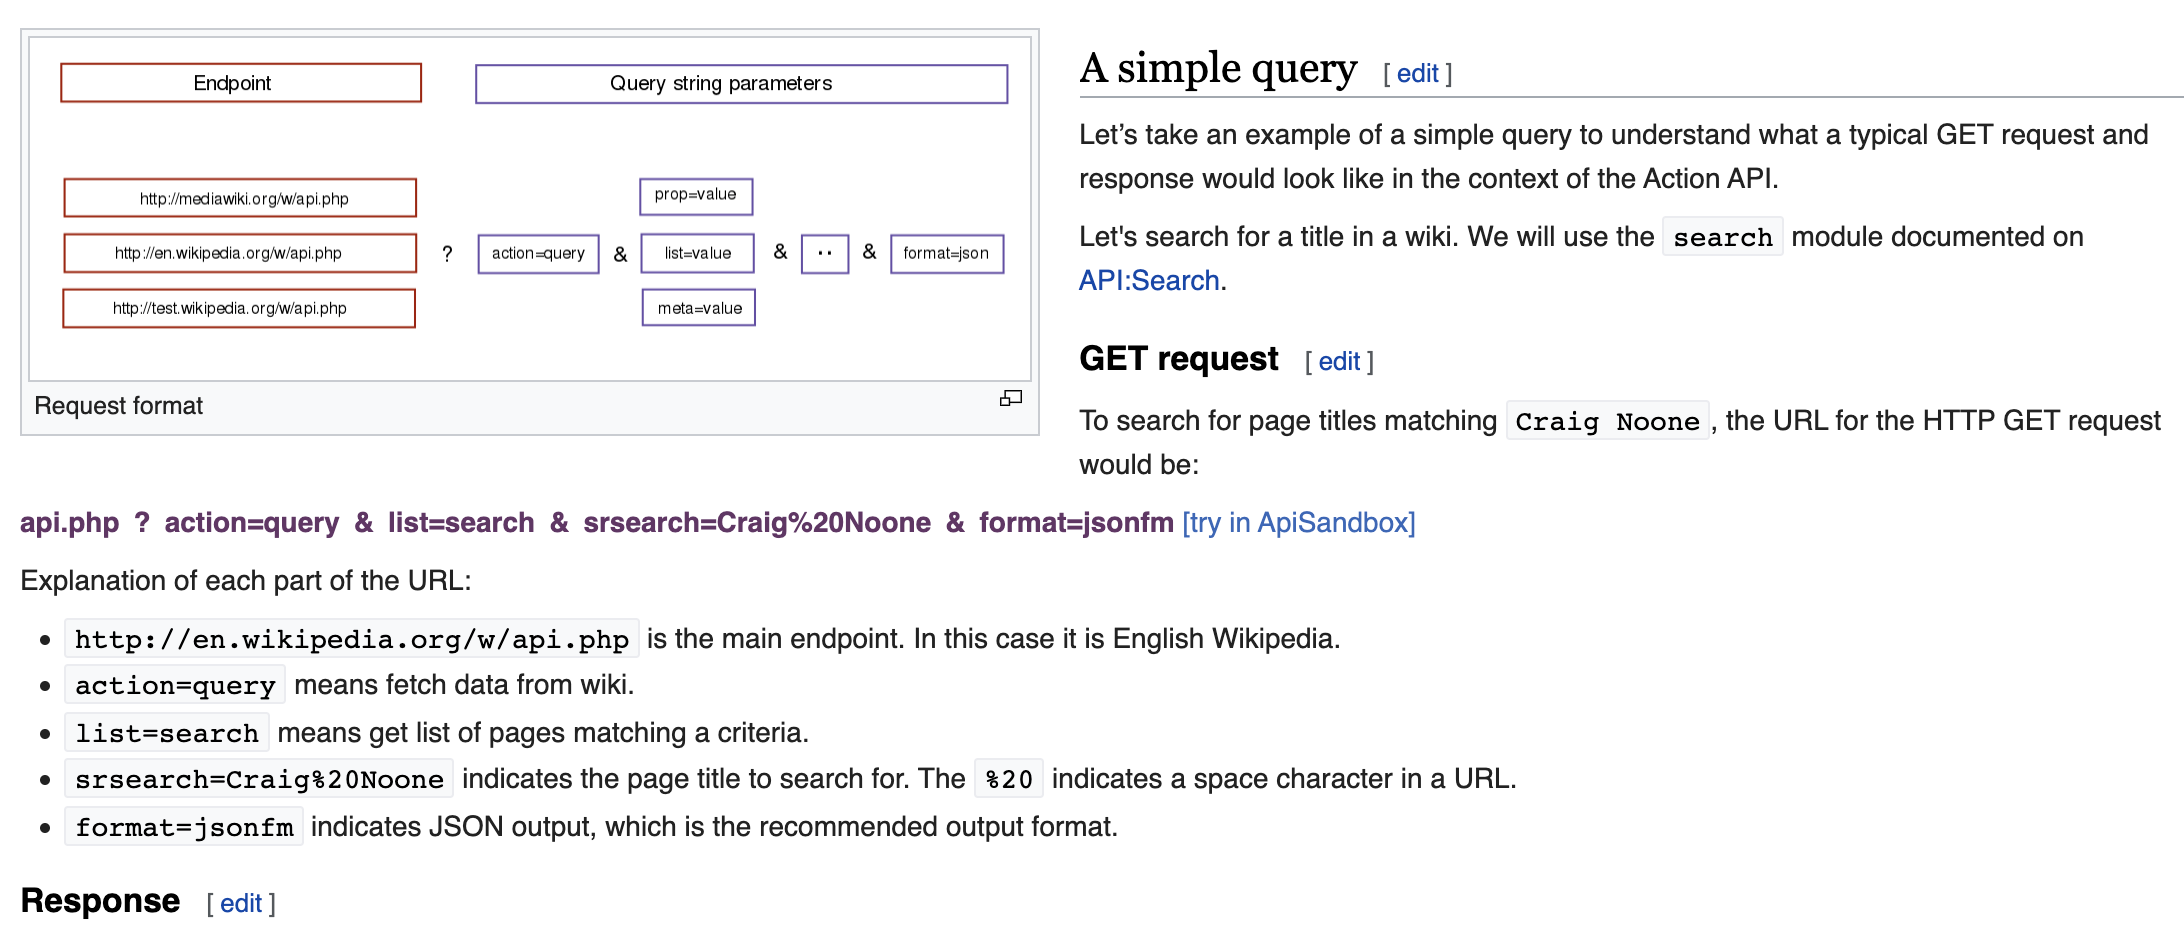

In [ ]:
# example
#request = requests.get('https://en.wikipedia.org/w/api.php?action=query&list=search&srsearch=Craig%20Noone&format=jsonfm')
request = requests.get('https://en.wikipedia.org/w/api.php?action=query&list=search&srsearch=Craig%20Noone&format=jsonfm')





In [55]:
S = requests.Session()

URL = "https://en.wikipedia.org/w/api.php"

PARAMS = {
    "action": "query",
    "format": "json",
    "titles": "Albert Einstein",
    "prop": "info",
    "inprop": "url|talkid"
}

R = S.get(url=URL, params=PARAMS)
DATA = R.json()

PAGES = DATA["query"]["pages"]

for k, v in PAGES.items():
    print(v["title"] + " has " + str(v["length"]) + " bytes.")

Albert Einstein has 161273 bytes.


In [56]:
DATA

{'batchcomplete': '',
 'query': {'pages': {'736': {'pageid': 736,
    'ns': 0,
    'title': 'Albert Einstein',
    'contentmodel': 'wikitext',
    'pagelanguage': 'en',
    'pagelanguagehtmlcode': 'en',
    'pagelanguagedir': 'ltr',
    'touched': '2019-12-08T05:59:13Z',
    'lastrevid': 929255631,
    'length': 161273,
    'talkid': 21091085,
    'fullurl': 'https://en.wikipedia.org/wiki/Albert_Einstein',
    'editurl': 'https://en.wikipedia.org/w/index.php?title=Albert_Einstein&action=edit',
    'canonicalurl': 'https://en.wikipedia.org/wiki/Albert_Einstein'}}}}

In [111]:
#!/usr/bin/python3

"""
    parse.py

    MediaWiki API Demos
    Demo of `Parse` module: Parse content of a page

    MIT License
"""

import requests

S = requests.Session()

URL = "https://en.wikipedia.org/w/api.php"

PARAMS = {
    "action": "parse",
    "page": "Agaricus abruptibulbus",
    "format": "json"
}

R = S.get(url=URL, params=PARAMS)
DATA = R.json()

print((DATA["parse"]["text"]["*"])


AttributeError: 'str' object has no attribute 'get_text'

In [70]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(DATA["parse"]["text"]["*"], 'html.parser')
print(soup.prettify())

<div class="mw-parser-output">
 <p class="mw-empty-elt">
 </p>
 <table class="infobox biota" style="text-align: left; width: 200px; font-size: 100%">
  <tbody>
   <tr>
    <th colspan="2" style="text-align: center; background-color: rgb(145,250,250)">
     <i>
      Agaricus abruptibulbus
     </i>
    </th>
   </tr>
   <tr>
    <td colspan="2" style="text-align: center">
     <a class="image" href="/wiki/File:Agaricus_abruptibulbus.jpg">
      <img alt="Agaricus abruptibulbus.jpg" data-file-height="1944" data-file-width="2592" decoding="async" height="176" src="//upload.wikimedia.org/wikipedia/commons/thumb/7/71/Agaricus_abruptibulbus.jpg/234px-Agaricus_abruptibulbus.jpg" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/7/71/Agaricus_abruptibulbus.jpg/351px-Agaricus_abruptibulbus.jpg 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/7/71/Agaricus_abruptibulbus.jpg/468px-Agaricus_abruptibulbus.jpg 2x" width="234"/>
     </a>
    </td>
   </tr>
   <tr>
    <th colspan="2" style

In [73]:

# #2
# soup = BeautifulSoup(page.content, 'html.parser')

# #3
# seven_day = soup.find(id="detailed-forecast-body")
bodycontent = soup.find_all(class_='mw-body-content')

bodycontent
#4
# info = bodycontent.find_all(class_="infobox")
# info


[]

In [74]:
page = requests.get("https://en.wikipedia.org/wiki/Agaricus_abruptibulbus")
soup = BeautifulSoup(page.content, 'html.parser')

In [88]:
bodycontent = soup.find(id='bodyContent')

print(bodycontent)

<div class="mw-body-content" id="bodyContent">
<div class="noprint" id="siteSub">From Wikipedia, the free encyclopedia</div>
<div id="contentSub"></div>
<div id="jump-to-nav"></div>
<a class="mw-jump-link" href="#mw-head">Jump to navigation</a>
<a class="mw-jump-link" href="#p-search">Jump to search</a>
<div class="mw-content-ltr" dir="ltr" id="mw-content-text" lang="en"><div class="mw-parser-output"><p class="mw-empty-elt">
</p>
<table class="infobox biota" style="text-align: left; width: 200px; font-size: 100%">
<tbody><tr>
<th colspan="2" style="text-align: center; background-color: rgb(145,250,250)"><i>Agaricus abruptibulbus</i>
</th></tr>
<tr>
<td colspan="2" style="text-align: center"><a class="image" href="/wiki/File:Agaricus_abruptibulbus.jpg"><img alt="Agaricus abruptibulbus.jpg" data-file-height="1944" data-file-width="2592" decoding="async" height="176" src="//upload.wikimedia.org/wikipedia/commons/thumb/7/71/Agaricus_abruptibulbus.jpg/234px-Agaricus_abruptibulbus.jpg" srcse

In [95]:
info = bodycontent.find_all(class_="infobox")
info[1].prettify()

'<table class="infobox" style="width:22em">\n <tbody>\n  <tr>\n   <th colspan="2" style="text-align:center;font-size:125%;font-weight:bold;background-color: #91FAFA">\n    <i>\n     Agaricus abruptibulbus\n    </i>\n   </th>\n  </tr>\n  <tr>\n   <td colspan="2" style="text-align:center;background-color: #91FAFA; font-style: italic; font-size: 110%">\n    <div class="floatright">\n     <a href="/wiki/Template:Mycomorphbox" title="float">\n      <img alt="View the Mycomorphbox template that generates the following list" data-file-height="62" data-file-width="62" decoding="async" height="14" src="//upload.wikimedia.org/wikipedia/en/thumb/3/35/Information_icon.svg/14px-Information_icon.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/3/35/Information_icon.svg/21px-Information_icon.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/3/35/Information_icon.svg/28px-Information_icon.svg.png 2x" width="14"/>\n     </a>\n    </div>\n    <a href="/wiki/Mycology" title="Mycology">\n 

In [120]:
len(info)

2

#### Get species and genus

In [122]:
name = [i.string for i in info[1].findAll('i')]
name

['Agaricus abruptibulbus']

## Get remaining mushroom info

In [182]:
divs = info[1].findAll("td")

#remove first line since we dont cate about it then get info
stuff= divs[1:]
for i in stuff:
    text=(i.get_text())
    print(text,'\n')

gills on hymenium 

cap is convex
   or flat 

hymenium is free 

stipe has a ring 

spore print is brown 

ecology is saprotrophic 

edibility: edible 



gills on hymenium 

cap is convex
   or flat 

hymenium is free 

stipe has a ring 

spore print is brown 

ecology is saprotrophic 

edibility: edible 



In [130]:
deets = [td.string for td in info[1].findAll('tr')]
deets

['Agaricus abruptibulbus', None, None, None, None, None, None, None, None]

In [146]:
body= [b.string for b in info[1].findAll('b')]

# body = info[1].find('body')
print(body)
# the_contents_of_body_without_body_tags = body.findChildren()

['gills', 'convex', 'flat', 'free', 'ring', 'brown', 'saprotrophic', 'edible']


In [116]:
info1=info[1].get_text()
info1

# row = info[1].find_all(scope='row')
# row

'Agaricus abruptibulbus Mycological characteristicsgills on hymenium\ncap is convex\n   or flathymenium is freestipe has a ringspore print is brownecology is saprotrophicedibility: edible'

In [119]:
info1.split(body[0],1)[1]

' on hymenium\ncap is convex\n   or flathymenium is freestipe has a ringspore print is brownecology is saprotrophicedibility: edible'

In [2]:
#column names for data file
colnames = ["class",
            "cap_shape",
            "cap_surface",
            "cap_color",
            "bruises",
            "odor",
            "gill_attachment",
            "gill_spacing",
            "gill_size",
            "gill_color",
            "stalk_shape",
            "stalk_root",
            "stalk_surface_above_ring",
            "stalk_surface_below_ring",
            "stalk_color_above_ring",
            "stalk_color_below_ring",
            "veil_type",
            "veil_color",
            "ring_number",
            "ring_type",
            "spore_print_color",
            "population",
            "habitat"]

In [3]:
df = pd.read_csv('expanded', names=colnames, header=None)#,sep='\t')
df.drop(df.index[-1], inplace=True)

In [4]:
df.head()

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
1,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
2,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
3,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
4,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS


In [5]:
df.describe()

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
count,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,...,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,EDIBLE,CONVEX,SCALY,BROWN,NO,NONE,FREE,CLOSE,BROAD,BUFF,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,WHITE,SEVERAL,WOODS
freq,4488,3796,3268,2320,5040,3808,8200,6824,5880,1728,...,5076,4744,4640,8416,8216,7768,3968,2424,4064,3160


In [6]:
df.shape

(8416, 23)

In [7]:
df['class'].value_counts()

EDIBLE       4488
POISONOUS    3928
Name: class, dtype: int64

In [8]:
df.isna().sum()

class                       0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
dtype: int64

In [9]:
#look at unique items in each count to get a better understanding of data and check for errors
unique_vals =0
for col in colnames:
    unique_vals += len(df[col].value_counts())
    print(df[col].value_counts())
print(unique_vals)

EDIBLE       4488
POISONOUS    3928
Name: class, dtype: int64
CONVEX     3796
FLAT       3292
KNOBBED     840
BELL        452
SUNKEN       32
CONICAL       4
Name: cap_shape, dtype: int64
SCALY      3268
SMOOTH     2684
FIBROUS    2460
GROOVES       4
Name: cap_surface, dtype: int64
BROWN       2320
GRAY        2096
RED         1500
YELLOW      1072
WHITE       1040
BUFF         168
PINK         144
CINNAMON      44
PURPLE        16
GREEN         16
Name: cap_color, dtype: int64
NO         5040
BRUISES    3376
Name: bruises, dtype: int64
NONE        3808
FOUL        2160
SPICY        576
FISHY        576
ANISE        400
ALMOND       400
PUNGENT      256
CREOSOTE     192
MUSTY         48
Name: odor, dtype: int64
FREE        8200
ATTACHED     216
Name: gill_attachment, dtype: int64
CLOSE      6824
CROWDED    1592
Name: gill_spacing, dtype: int64
BROAD     5880
NARROW    2536
Name: gill_size, dtype: int64
BUFF         1728
PINK         1556
WHITE        1232
BROWN        1112
CHOCOLATE  

#### First we need to make dummy variables for our catagorical data

In [11]:
xdf = df.drop(columns=['class', 'odor'])
xdf.head()

,cap_shape,cap_surface,cap_color,bruises,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,CONVEX,SMOOTH,WHITE,BRUISES,FREE,CROWDED,NARROW,WHITE,TAPERING,BULBOUS,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
1,CONVEX,SMOOTH,WHITE,BRUISES,FREE,CROWDED,NARROW,WHITE,TAPERING,BULBOUS,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
2,CONVEX,SMOOTH,WHITE,BRUISES,FREE,CROWDED,NARROW,PINK,TAPERING,BULBOUS,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
3,CONVEX,SMOOTH,WHITE,BRUISES,FREE,CROWDED,NARROW,PINK,TAPERING,BULBOUS,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
4,CONVEX,SMOOTH,WHITE,BRUISES,FREE,CROWDED,NARROW,BROWN,TAPERING,BULBOUS,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS


In [19]:
xdf.columns

Index(['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'gill_attachment',
       'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape', 'stalk_root',
       'stalk_surface_above_ring', 'stalk_surface_below_ring',
       'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type',
       'veil_color', 'ring_number', 'ring_type', 'spore_print_color',
       'population', 'habitat'],
      dtype='object')

In [36]:
# Create dummy variables
data = pd.get_dummies(df.drop(columns=['class', 'odor']))
y = df['class']
data.head()

,cap_shape_BELL,cap_shape_CONICAL,cap_shape_CONVEX,cap_shape_FLAT,cap_shape_KNOBBED,cap_shape_SUNKEN,cap_surface_FIBROUS,cap_surface_GROOVES,cap_surface_SCALY,cap_surface_SMOOTH,...,population_SCATTERED,population_SEVERAL,population_SOLITARY,habitat_GRASSES,habitat_LEAVES,habitat_MEADOWS,habitat_PATHS,habitat_URBAN,habitat_WASTE,habitat_WOODS
0,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1


In [37]:
#break up data for testing and training
data_train, data_test, y_train, y_test = train_test_split(data, y,test_size=.2)

In [38]:
#function used to plot feature importance
def plot_feature_importances(model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(20,20))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

## Regular Tree

In [39]:
# Instantiate and fit a DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=2) 
tree_clf.fit(data_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

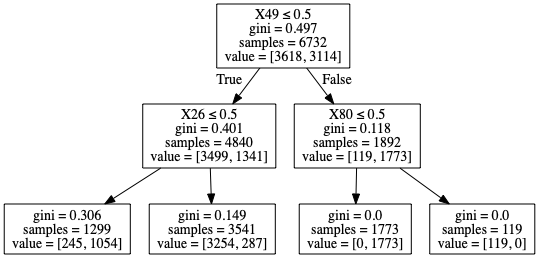

In [40]:
# visualizing the regression tree
dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data,  
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

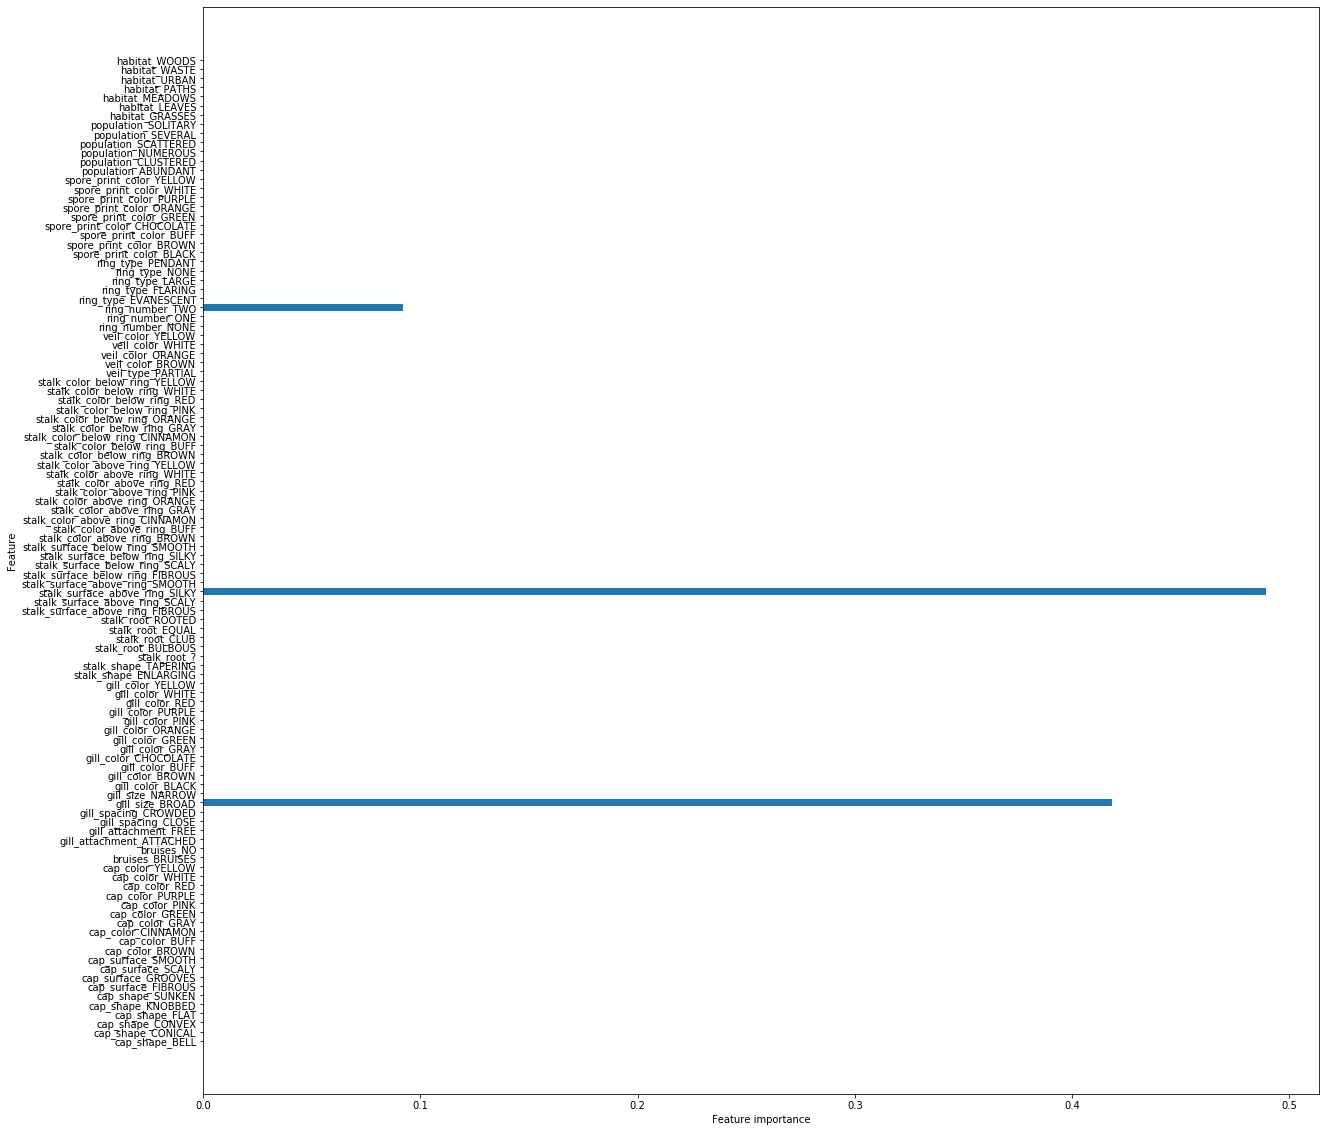

In [42]:
plot_feature_importances(tree_clf)

In [43]:
# Test set predictions
pred = tree_clf.predict(data_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[803  67]
 [ 73 741]]
              precision    recall  f1-score   support

      EDIBLE       0.92      0.92      0.92       870
   POISONOUS       0.92      0.91      0.91       814

    accuracy                           0.92      1684
   macro avg       0.92      0.92      0.92      1684
weighted avg       0.92      0.92      0.92      1684



## Random Forest

In [44]:
# Instantiate a BaggingClassifier
# bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
#                                  n_estimators=20)

In [45]:
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(data_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
# Training accuracy score
forest.score(data_train, y_train)

0.9916815210932858

In [47]:
# Test accuracy score
forest.score(data_test, y_test)

0.9904988123515439

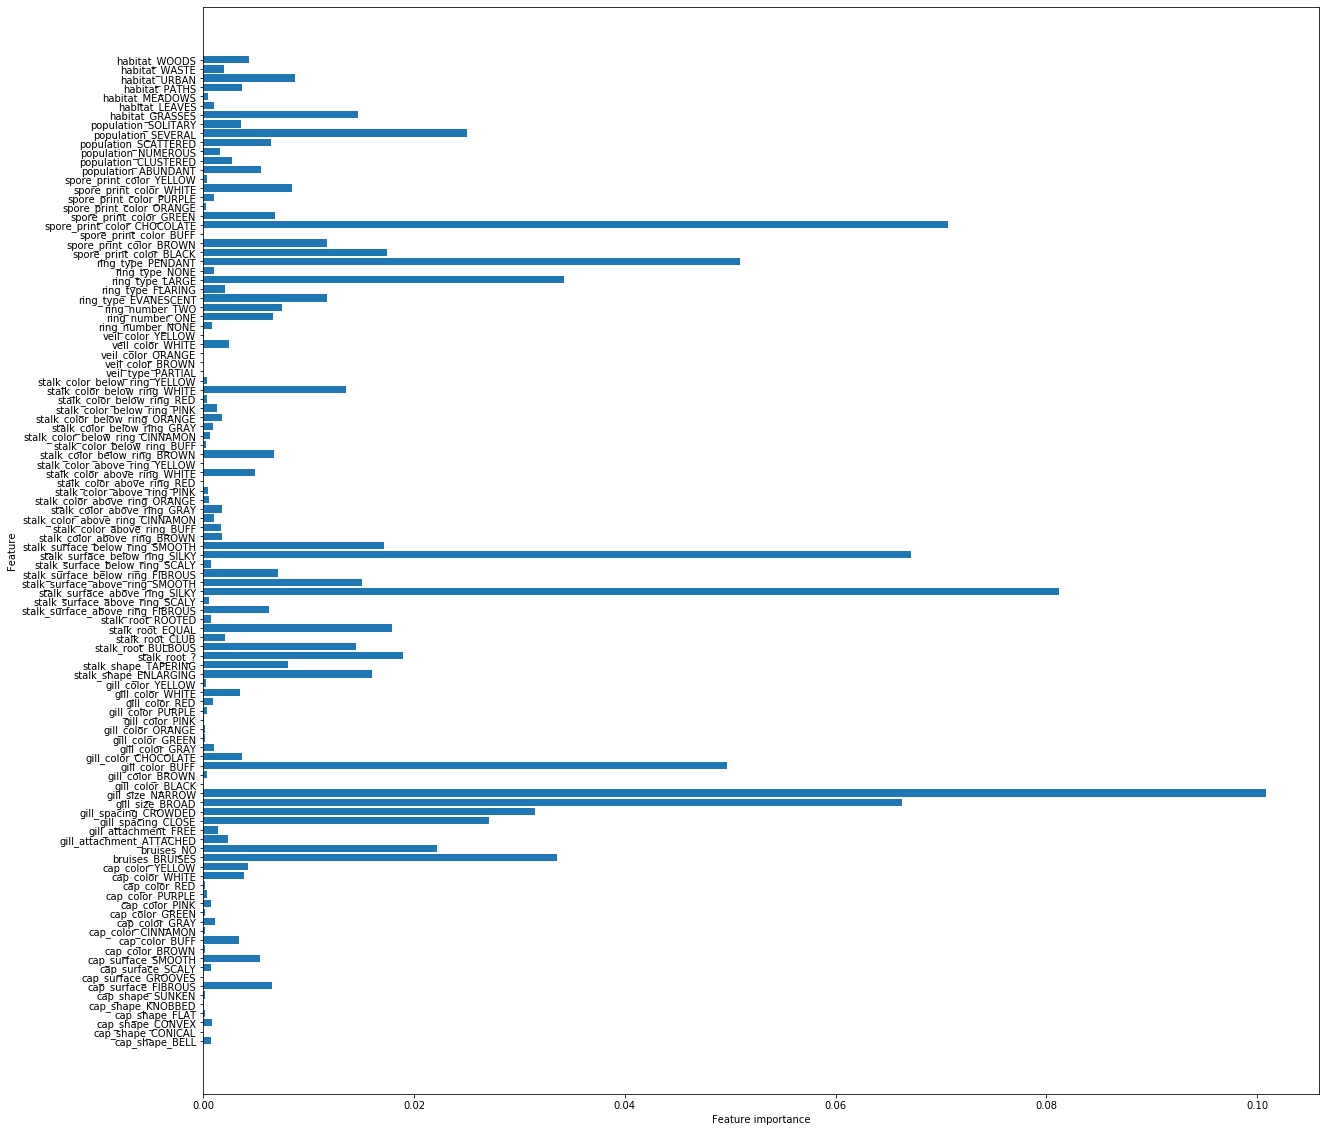

In [48]:
plot_feature_importances(forest)

### Load in X and y variables

## Mushroom Observer Database

In [32]:
dfm = pd.read_csv('observations.csv')
dfm.head()

ParserError: Error tokenizing data. C error: Expected 4 fields in line 16, saw 6
